# Regression

In [133]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

%matplotlib notebook

In [105]:
df = quandl.get('WIKI/GOOG')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low']
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']

df = df[['Adj. Close','HL_PCT','PCT_change','Volume']]

forecast_col = 'Adj. Close'
df.fillna(-9999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df = df.dropna()

In [106]:
x = np.array(df.drop(columns = ['label']))
y = np.array(df['label'])

X = preprocessing.scale(x)
X_lately = X[-forecast_out:]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model = LinearRegression(n_jobs=10)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

forecast_set = model.predict(X_lately)

C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


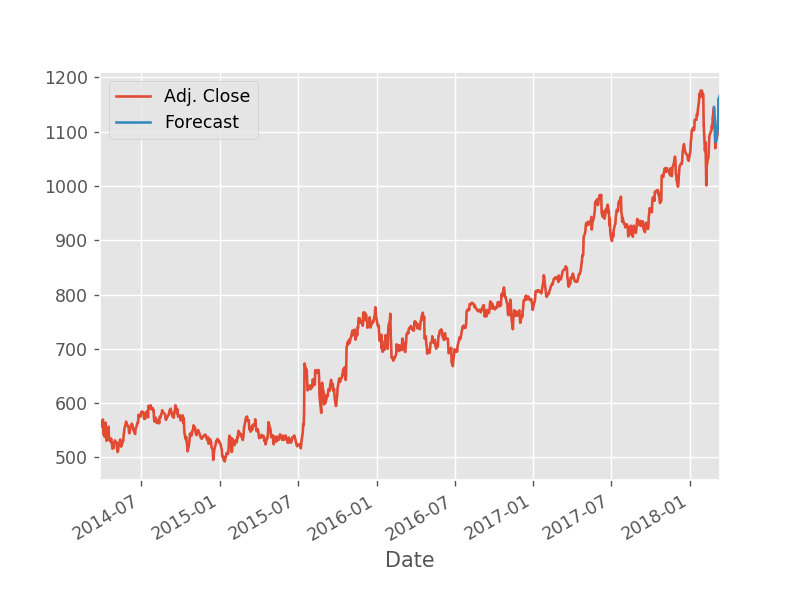

In [131]:
df['Forecast'] = np.nan
df.iloc[-forecast_out:]['Forecast'] = forecast_set

#style.use('ggplot')
df[['Adj. Close','Forecast']].plot()

In [135]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(model, f)
    
pickle_in = open('linearregression.pickle','rb')
model_import = pickle.load(pickle_in)

In [112]:
last_date = df.iloc[-forecast_out].name
last_date

Timestamp('2018-02-26 00:00:00')

C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df

,Adj. Close,HL_PCT,PCT_change,Volume,label,Forecast
Date,,,,,,
2014-03-27,558.46,0.027273,-0.016796,13100.0,530.60,NaN
2014-03-28,559.99,0.013890,-0.002156,41100.0,532.52,NaN
2014-03-31,556.97,0.018081,-0.017499,10800.0,536.44,NaN
2014-04-01,567.16,0.017433,0.015124,7900.0,556.54,NaN
2014-04-02,567.00,0.075846,0.003352,146700.0,536.10,NaN
2014-04-03,569.74,0.041037,-0.000193,5085200.0,528.62,NaN
2014-04-04,543.14,0.064033,-0.054833,6351900.0,534.81,NaN
2014-04-07,538.15,0.040463,-0.004790,4389600.0,526.94,NaN
2014-04-08,554.90,0.024723,0.022669,3142600.0,525.16,NaN
